## Importing libraries
##### Also setting the default graph size

In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Reading the ratings datasets
##### Removed the BX- prefix from the datasets for readability
##### Reading the dataset, skiping corrupt lines since there are a few 
##### Changing the headers to be more readable
##### Printing the first 10 lines

In [162]:
book_ratings_data = pd.read_csv('Book-Ratings.csv', on_bad_lines='skip', delimiter=";")
book_ratings_data.columns = ["userId", "isbn", "bookRating"]
book_ratings_data_df = pd.DataFrame(book_ratings_data, columns=book_ratings_data.columns)
book_ratings_data_df.head(10)

,userId,isbn,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


## Reading the books datasets
##### Reading the dataset, skiping corrupt lines since there are a few, since there are a few name that are not UTF-8 complaiant we have to change the encoding 
##### Renaming the headers for readability 
##### Manualy changing some rows with the correct values since they had year / publisher / author mixed up, this came up when trying to make all the years to a number since some of the years was in strings
##### Changeing all the years to numbers so everyting is the same
##### Printing the first 10 lines

In [163]:
books_data = pd.read_csv('Books.csv', on_bad_lines='skip', delimiter=";", encoding='latin-1')
books_data.columns = ["isbn", "bookTitle", "bookAuthor","year" ,"publisher", "imageUrlS", "imageUrlM", "imageUrlL"]
books_data_df = pd.DataFrame(books_data, columns=books_data.columns)

books_data_df.loc[books_data_df.isbn == '078946697X','year'] = 2000
books_data_df.loc[books_data_df.isbn == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books_data_df.loc[books_data_df.isbn == '078946697X','publisher'] = "DK Publishing Inc"

books_data_df.loc[books_data_df.isbn == '0789466953', 'year'] = 2000
books_data_df.loc[books_data_df.isbn == '0789466953', 'bookAuthor'] = "James Buckley"
books_data_df.loc[books_data_df.isbn == '0789466953', 'publisher'] = "DK Publishing Inc"


books_data_df.loc[books_data_df.isbn == '2070426769','year'] = 2003
books_data_df.loc[books_data_df.isbn == '2070426769','bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books_data_df.loc[books_data_df.isbn == '2070426769','publisher'] = 'Gallimard'

books_data_df.year = pd.to_numeric(books_data_df.year)
books_data_df.head(10)

C:\Users\Anton\AppData\Local\Temp\ipykernel_17920\226224533.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_data = pd.read_csv('Books.csv', on_bad_lines='skip', delimiter=";", encoding='latin-1')


,isbn,bookTitle,bookAuthor,year,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


## Reading the Users datasets
##### Reading the dataset, skiping corrupt lines since there are a few since there are a few name that are not UTF-8 complaiant we have to change the encoding 
##### Renaming to column headers for readability
##### Printing the first 10 lines
##### We can already here see that the location colum are a bit inconsistent are can expect some wierd behavior

In [164]:
users_data = pd.read_csv('Users.csv', on_bad_lines='skip', delimiter=";", encoding='latin-1')
users_data.columns = ["userId", "location", "age"]
users_data_df = pd.DataFrame(users_data, columns=users_data.columns)
users_data_df.head(10)

,userId,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


## We merge some dataframes so its easier to visualize
##### First mergning book_ratings with books_data 

In [165]:
book_rating = pd.merge(book_ratings_data_df, books_data_df, on='isbn')

##### Then merging book_ratings with users_data

In [166]:
final_ratings = pd.merge(book_rating, users_data_df, on='userId')

## Getting how many reviews each book has

In [167]:
new_book_ratings_data_df = book_ratings_data_df
reviewCount = book_ratings_data_df.isbn.value_counts()
new_book_ratings_data_df = new_book_ratings_data_df.drop(["userId"],axis=1)
new_book_ratings_data_df.columns = ['isbn', 'reviewCount']
new_book_ratings_data_df = reviewCount
new_book_ratings_data_df = new_book_ratings_data_df.to_frame()
new_book_ratings_data_df = new_book_ratings_data_df.reset_index()
new_book_ratings_data_df.columns = ['isbn', 'reviewCount']
new_book_ratings_data_df

,isbn,reviewCount
0,0971880107,2502
1,0316666343,1295
2,0385504209,883
3,0060928336,732
4,0312195516,723
...,...,...
340551,1568656386,1
340552,1568656408,1
340553,1569551553,1
340554,1570081808,1


## Merge so we can know the total reviws for each book
##### Merging books_data with total reviews data so we get how many times a book have been reviewd in the same data frame

In [168]:
books_data_df = pd.merge(books_data_df, new_book_ratings_data_df, on='isbn')
books_data_df.head(10)

,isbn,bookTitle,bookAuthor,year,publisher,imageUrlS,imageUrlM,imageUrlL,reviewCount
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,33
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,5
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,3
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,1
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,1


## Calculating the mean rating for each book
##### Getting the mean rating of all books

In [169]:
mean_df = book_ratings_data_df.groupby(['isbn'])['bookRating'].mean().reset_index()
mean_df.columns = ["isbn", "mean"]
mean_df

,isbn,mean
0,0330299891,3.0
1,0375404120,1.5
2,0586045007,0.0
3,9022906116,3.5
4,9032803328,0.0
...,...,...
340551,cn113107,0.0
340552,ooo7156103,7.0
340553,Խcrosoft,7.0
340554,�3499128624,8.0


##### Merging books_data and mean ratings so we get the mean rating of each book in the same data frame

In [170]:
books_data_df = pd.merge(books_data_df, mean_df, on='isbn')
books_data_df.head(10)

,isbn,bookTitle,bookAuthor,year,publisher,imageUrlS,imageUrlM,imageUrlL,reviewCount,mean
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11,4.272727
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1,0.000000
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,33,4.212121
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,5,1.600000
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,3,2.666667
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,1,0.000000
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,1,5.000000


## EDA 
#### Here we can see there is alot of books with 0 as rating, beacuse we merged the data they way we did all books have some rating as 0 since no user have read all books
#### So the 0 colums here is duplicates, from users that have not reviewd that book

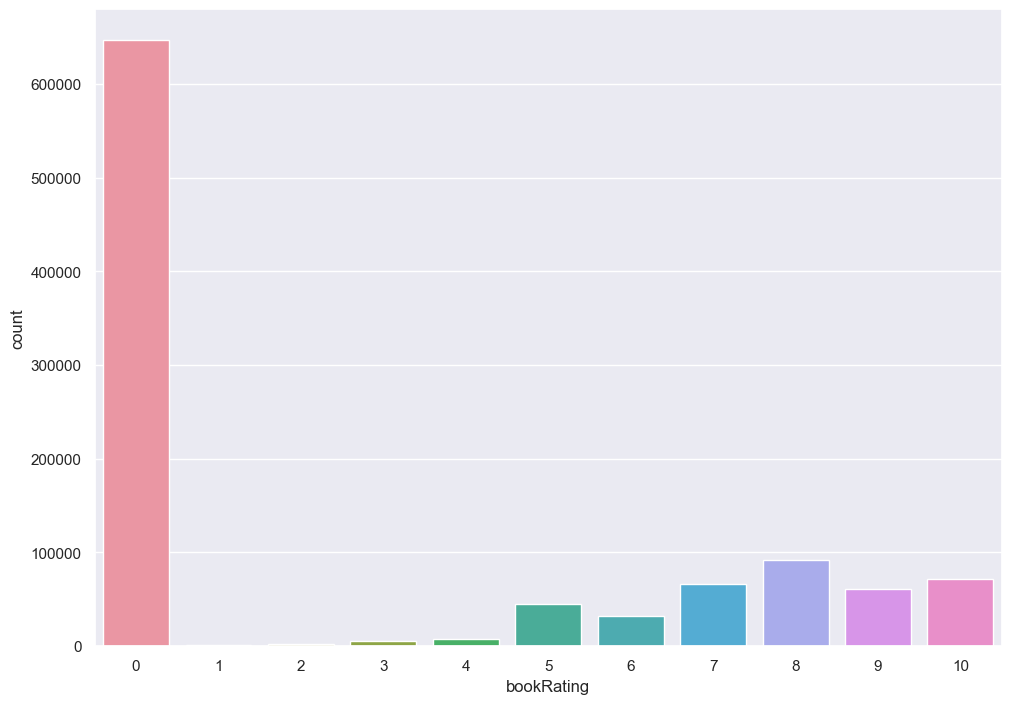

In [171]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=final_ratings['bookRating'])
plt.show()

## Removing everything with a 0 rating
#### Removing the 0 colums for a more clear picture of the spread of the ratings

In [172]:
final_ratings = final_ratings[final_ratings.bookRating != 0]

## Here we get a better feel for the scale and spread of the ratings
#### We can see a very large gap from rating 5 and higher
#### Most books have gotten the rating 8

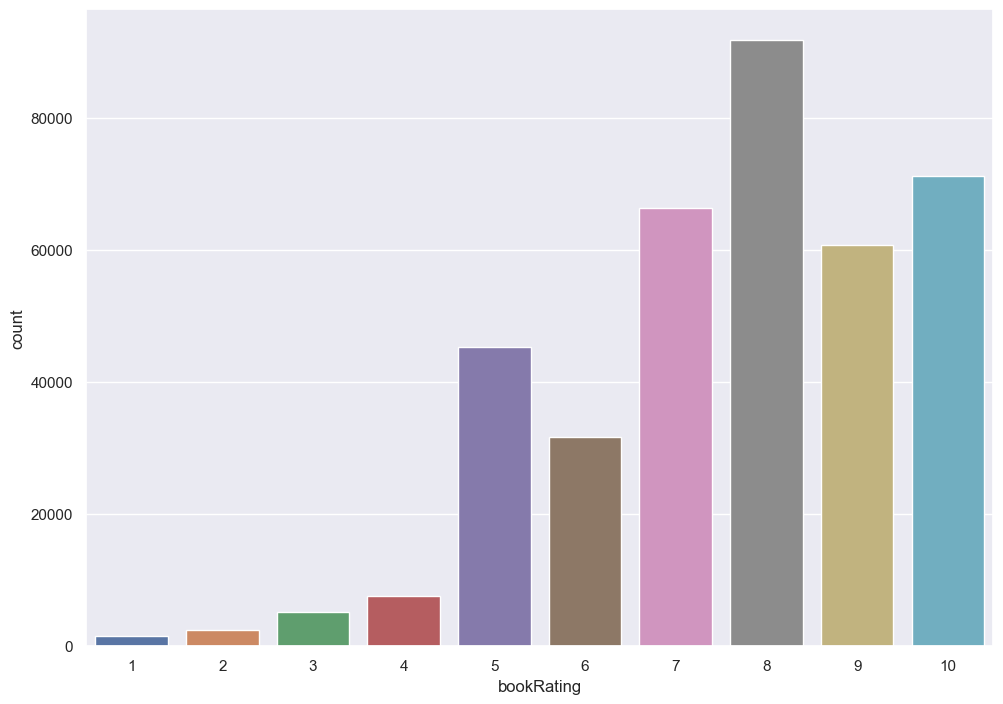

In [173]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=final_ratings['bookRating'])
plt.show()

## Simple plot that shows how many reviews what amount of books has
#### Here we created a graph of how many reviews a book has, we can see the majority of books have only one review, this could affect how we create out model

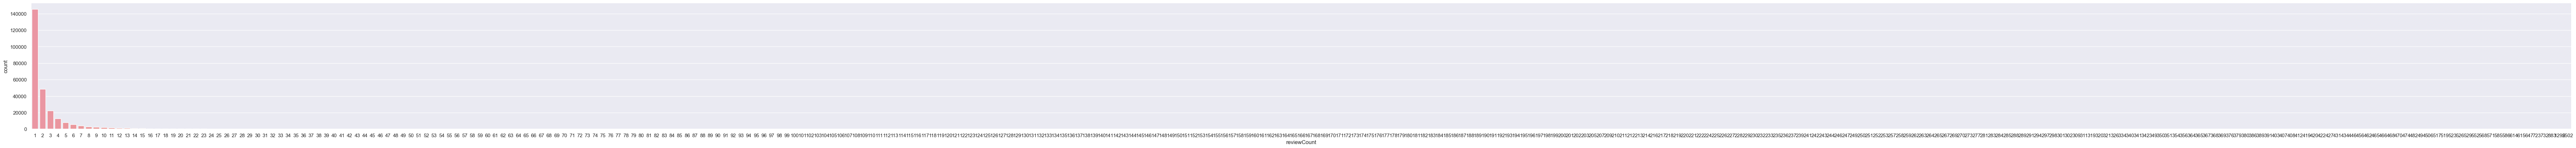

In [174]:
sns.set(rc={'figure.figsize':(100,5)})
filtered_books_data = books_data_df[books_data_df.reviewCount > 0]
sns.countplot(x=filtered_books_data['reviewCount'])
plt.show()

#### Here we are plotting the years books have been realesed, with this we can see before 1970 there have are a unoticable amount of books realeased 
#### And most books in 2002

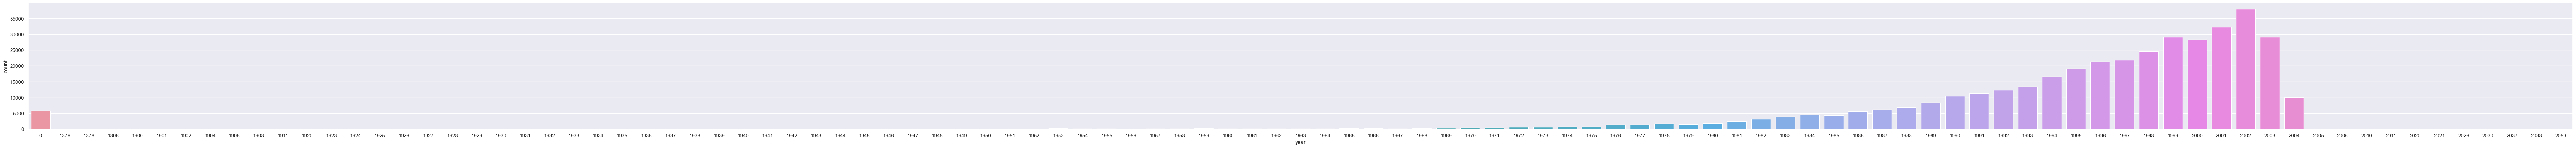

In [175]:
sns.set(rc={'figure.figsize':(100,5)})
sns.countplot(x=final_ratings['year'])
plt.show()

## Here we can see the ages of the users who have rated books, the most usual age is 24

#### This data also needs some cleanup since there are ages all the way up to 244years which cant be real data

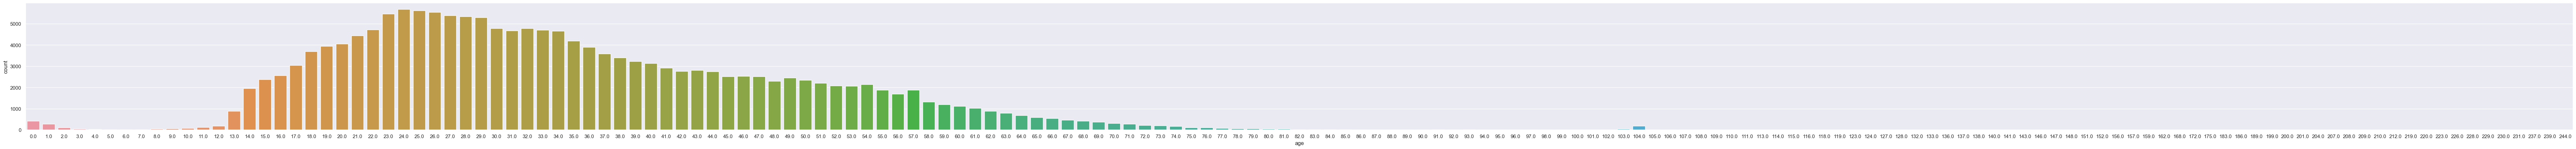

In [176]:
sns.set(rc={'figure.figsize':(100,5)})
sns.countplot(x=users_data_df['age'])
plt.show()

## Removing all ratings that have been made by some one over 100, we might lose some valid ratings but we get rid of unnesecary data

In [177]:
users_data_df = users_data_df[users_data_df.age <= 100]

#### Here we can see a bit clearer the spread and range of the ages
#### We also see that some users have put their age as 0 or 1 etc, this is not real data

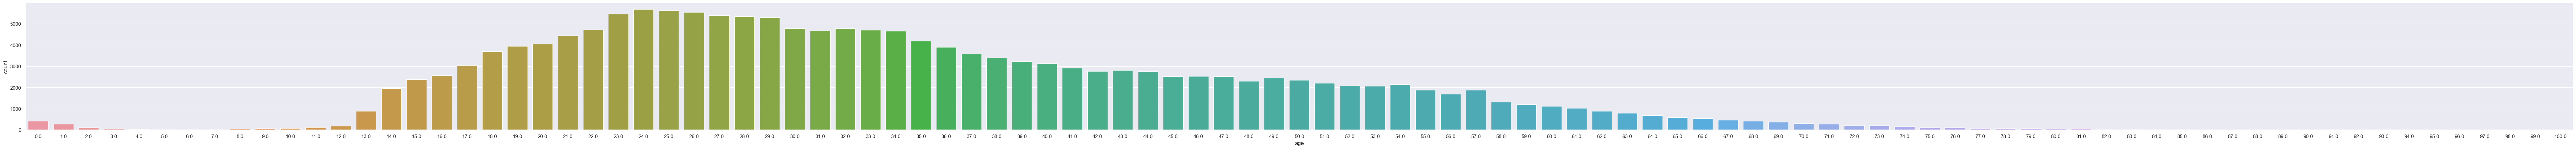

In [178]:
sns.set(rc={'figure.figsize':(100,5)})
sns.countplot(x=users_data_df['age'])
plt.show()

## Here we can see the ratings over the years
#### We can see what ratings books ahve gotten the most each year

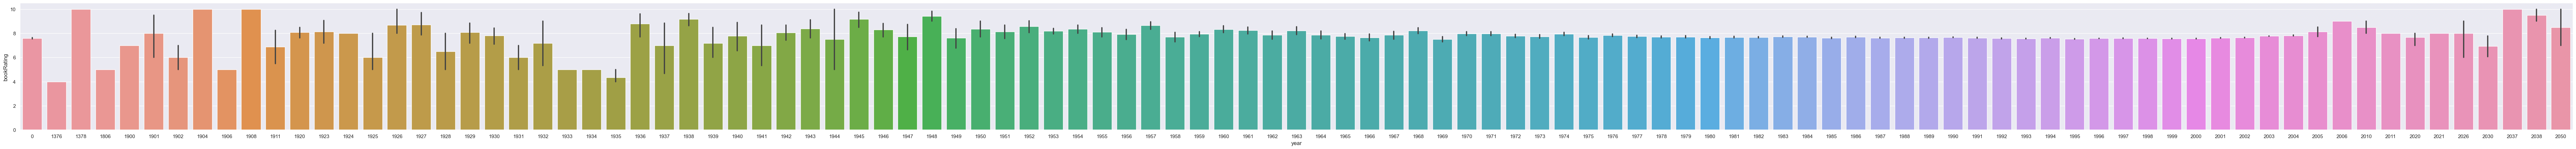

In [179]:
sns.set(rc={'figure.figsize':(100,5)})
sns.barplot(x=final_ratings['year'],y=final_ratings['bookRating'])
plt.show()

## Recommender System
#### First we need to get some data to base the recommender system on
#### Since we already have gotten the mean reating of each book we can filter out based on that some of the books which are not highly rated
#### We also dont include any books that have 0 reviews (there should already be 0 but just to make sure)

In [180]:
books_data_df_cp = books_data_df
validRatings = books_data_df_cp[(books_data_df_cp['reviewCount'] >= 1) & (books_data_df_cp['mean'] >= 2.5)]
validRatings.head(5)

,isbn,bookTitle,bookAuthor,year,publisher,imageUrlS,imageUrlM,imageUrlL,reviewCount,mean
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11,4.272727
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,33,4.212121
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,3,2.666667


#### We get the mean value of each book and take the mean of that
#### We can se the avrage book rating is 5.95..

In [181]:
mean = validRatings['mean'].mean()
mean

5.951983798356312

#### We choose to inclute 80% of the data

In [182]:
q = validRatings['reviewCount'].quantile(0.80)
q

4.0

## We choose this formula to calculate the score of each book, since it gave quite good results

In [183]:
def getScore(data, q=q, mean=mean):
    c = data['reviewCount']
    m = data['mean']
    return (c/(c+q) * m) + (q/(q+c) * mean)

#### We add a new colum to the data which is the score of each book based on the reviewCount and meanScore using the formula above

In [184]:
validRatings['score'] = validRatings.apply(getScore, axis=1)

C:\Users\Anton\AppData\Local\Temp\ipykernel_17920\1670093909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validRatings['score'] = validRatings.apply(getScore, axis=1)


#### We then sort the data frame in desc order on the score column we just creted

In [185]:
validRatings = validRatings.sort_values('score', ascending=False)

## We print the 25 best rated books 
#### We can see that the best rated book is The Lord Of The Rings, which means our system is good beacuse that is a common opinion (atleast better then some of the books here than no one have head of before)

In [186]:
validRatings.head(25)

,isbn,bookTitle,bookAuthor,year,publisher,imageUrlS,imageUrlM,imageUrlL,reviewCount,mean,score
15210,0395193958,The Lord of the Rings (Leatherette Collector's...,J. R. R. Tolkien,1974,Houghton Mifflin Company,http://images.amazon.com/images/P/0395193958.0...,http://images.amazon.com/images/P/0395193958.0...,http://images.amazon.com/images/P/0395193958.0...,6,10.000000,8.380794
29697,1563891336,Death: The High Cost of Living,Neil Gaiman,1994,DC Comics,http://images.amazon.com/images/P/1563891336.0...,http://images.amazon.com/images/P/1563891336.0...,http://images.amazon.com/images/P/1563891336.0...,9,9.444444,8.369841
79389,0091842050,The Blue Day Book: A Lesson in Cheering Yourse...,Bradley Trevor Greive,0,Random House Australia,http://images.amazon.com/images/P/0091842050.0...,http://images.amazon.com/images/P/0091842050.0...,http://images.amazon.com/images/P/0091842050.0...,11,9.181818,8.320529
78825,0823401898,The Shrinking of Treehorn,Florence Parry Heide,1971,Holiday House,http://images.amazon.com/images/P/0823401898.0...,http://images.amazon.com/images/P/0823401898.0...,http://images.amazon.com/images/P/0823401898.0...,8,9.500000,8.317328
159735,0385326335,A Letter to Mrs. Roosevelt,C. COCO DE YOUNG,1999,Delacorte Books for Young Readers,http://images.amazon.com/images/P/0385326335.0...,http://images.amazon.com/images/P/0385326335.0...,http://images.amazon.com/images/P/0385326335.0...,8,9.500000,8.317328
38812,1561840564,Prometheus Rising,Robert Anton Wilson,1992,New Falcon Publications,http://images.amazon.com/images/P/1561840564.0...,http://images.amazon.com/images/P/1561840564.0...,http://images.amazon.com/images/P/1561840564.0...,6,9.666667,8.180794
29696,1563893339,Death : The Time of Your Life (Death),Neil Gaiman,1997,DC Comics,http://images.amazon.com/images/P/1563893339.0...,http://images.amazon.com/images/P/1563893339.0...,http://images.amazon.com/images/P/1563893339.0...,7,9.428571,8.164358
15407,1563895730,Sandman: The Dream Hunters,Neil Gaiman,1999,DC Comics,http://images.amazon.com/images/P/1563895730.0...,http://images.amazon.com/images/P/1563895730.0...,http://images.amazon.com/images/P/1563895730.0...,8,9.250000,8.150661
90465,2205054252,"Le Combat ordinaire, tome 1",Larcenet,2003,Dargaud,http://images.amazon.com/images/P/2205054252.0...,http://images.amazon.com/images/P/2205054252.0...,http://images.amazon.com/images/P/2205054252.0...,8,9.250000,8.150661
16303,096265342X,Principia Discordia,Omar K. Ravenhurst,1991,Illuminet Press,http://images.amazon.com/images/P/096265342X.0...,http://images.amazon.com/images/P/096265342X.0...,http://images.amazon.com/images/P/096265342X.0...,5,9.800000,8.089771
